In [9]:
#importing libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as func
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
#loading MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor()
])

train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 34380663.51it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1222901.12it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 10683536.80it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2206965.80it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
print(len(train))
print(len(test))

60000
10000


In [4]:
print("shape of image is", train[0][0].shape)

shape of image is torch.Size([1, 28, 28])


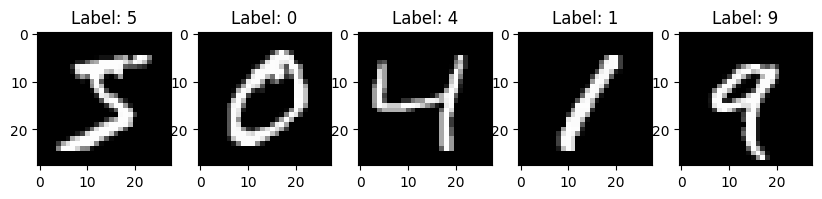

In [5]:
#Printing some images from dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 3))

for i in range(5):
    image, label = train[i]
    axes[i].imshow(image.squeeze().numpy(), cmap='gray')
    axes[i].set_title(f"Label: {label}")

plt.show()

In [6]:
#Creating dataloaders
batch_size = 100
train_loader = DataLoader(train, batch_size, shuffle=True)
test_loader = DataLoader(test, batch_size, shuffle=False)

Q1 a

In [ ]:
#Implementing autoencoder
class MNIST_ENCODER(nn.Module):
    def __init__(self,dim):
        super(MNIST_ENCODER, self).__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(dim, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [ ]:
#Function to train model
def train_model(model):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(30):
        for i, (data, _) in enumerate(train):
            data = data.to(device)
            data = data.view(data.size(0), -1)
            optimizer.zero_grad()
            reconstructed = model(data)
            loss = criterion(reconstructed, data)
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch+1}/{30} Loss: {loss.item():.4f}")
    return model

In [ ]:
#Training model with 32 hidden dimension
model32 = MNIST_ENCODER(32)
model_32 = train_model(model32)

Epoch 1/30 Loss: 0.1391
Epoch 2/30 Loss: 0.1410
Epoch 3/30 Loss: 0.1419
Epoch 4/30 Loss: 0.1419
Epoch 5/30 Loss: 0.1412
Epoch 6/30 Loss: 0.1405
Epoch 7/30 Loss: 0.1398
Epoch 8/30 Loss: 0.1396
Epoch 9/30 Loss: 0.1390
Epoch 10/30 Loss: 0.1394
Epoch 11/30 Loss: 0.1388
Epoch 12/30 Loss: 0.1390
Epoch 13/30 Loss: 0.1394
Epoch 14/30 Loss: 0.1396
Epoch 15/30 Loss: 0.1394
Epoch 16/30 Loss: 0.1391
Epoch 17/30 Loss: 0.1385
Epoch 18/30 Loss: 0.1384
Epoch 19/30 Loss: 0.1389
Epoch 20/30 Loss: 0.1378
Epoch 21/30 Loss: 0.1382
Epoch 22/30 Loss: 0.1385
Epoch 23/30 Loss: 0.1382
Epoch 24/30 Loss: 0.1379
Epoch 25/30 Loss: 0.1381
Epoch 26/30 Loss: 0.1383
Epoch 27/30 Loss: 0.1388
Epoch 28/30 Loss: 0.1377
Epoch 29/30 Loss: 0.1365
Epoch 30/30 Loss: 0.1358


In [ ]:
#Training model with 64 hidden dimension
model64 = MNIST_ENCODER(64)
model_64 = train_model(model64)

Epoch 1/30 Loss: 0.1118
Epoch 2/30 Loss: 0.1100
Epoch 3/30 Loss: 0.1084
Epoch 4/30 Loss: 0.1082
Epoch 5/30 Loss: 0.1078
Epoch 6/30 Loss: 0.1081
Epoch 7/30 Loss: 0.1076
Epoch 8/30 Loss: 0.1068
Epoch 9/30 Loss: 0.1067
Epoch 10/30 Loss: 0.1066
Epoch 11/30 Loss: 0.1062
Epoch 12/30 Loss: 0.1059
Epoch 13/30 Loss: 0.1063
Epoch 14/30 Loss: 0.1063
Epoch 15/30 Loss: 0.1068
Epoch 16/30 Loss: 0.1072
Epoch 17/30 Loss: 0.1071
Epoch 18/30 Loss: 0.1075
Epoch 19/30 Loss: 0.1080
Epoch 20/30 Loss: 0.1086
Epoch 21/30 Loss: 0.1086
Epoch 22/30 Loss: 0.1091
Epoch 23/30 Loss: 0.1091
Epoch 24/30 Loss: 0.1084
Epoch 25/30 Loss: 0.1083
Epoch 26/30 Loss: 0.1082
Epoch 27/30 Loss: 0.1076
Epoch 28/30 Loss: 0.1077
Epoch 29/30 Loss: 0.1073
Epoch 30/30 Loss: 0.1063


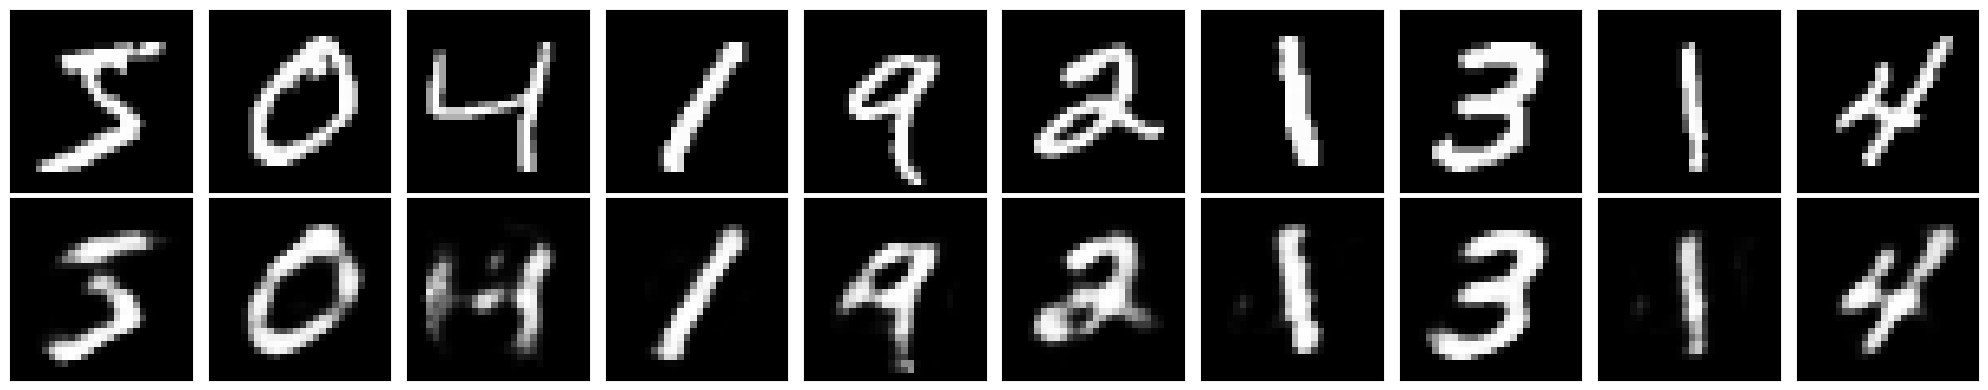

In [ ]:
# Function to display images
def show_images(original_images, reconstructed_images):
    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 4))

    for images, row in zip([original_images, reconstructed_images], axes):
        for img, ax in zip(images, row):
            ax.imshow(img.view(28, 28), cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.tight_layout()
    plt.show()

original_images_train = []
original_images_test = []
for i in range(10):
    image_tr, _ = train[i]
    image_ts, _ = test[i]
    original_images_train.append(image_tr)
    original_images_test.append(image_ts)


#Displaying images with model having 32 hidden dim
original_images_train = torch.stack(original_images_train).to(device)
reconstructed_train = model_32(original_images_train.view(original_images_train.size(0), -1))
show_images(original_images_train.cpu(), reconstructed_train.detach().cpu())



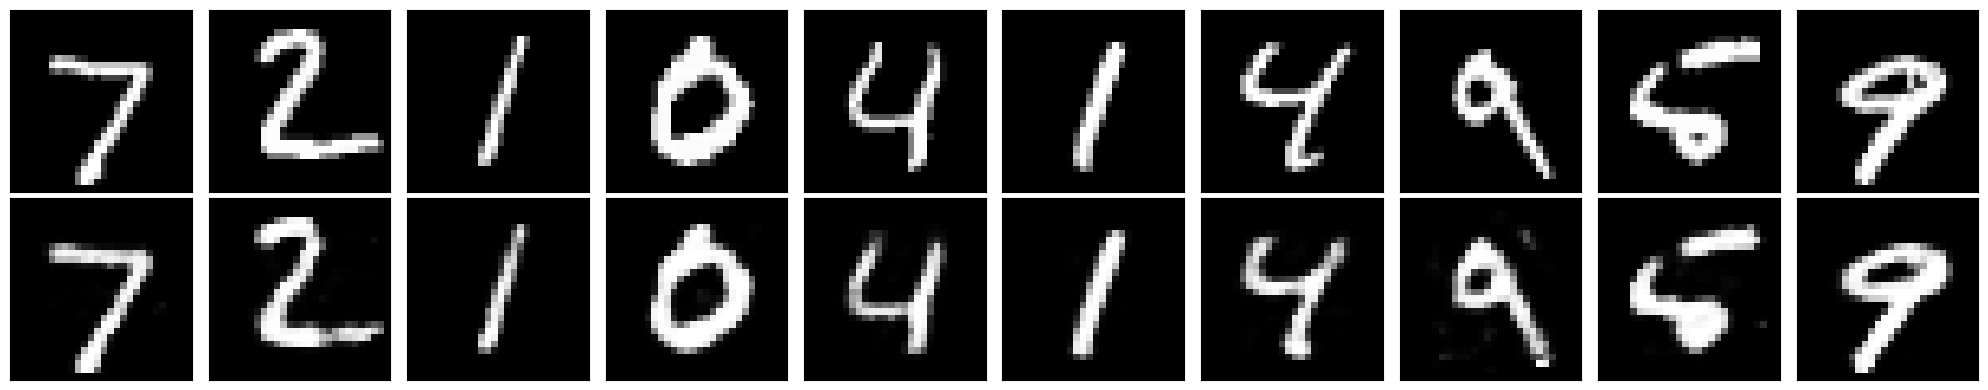

In [ ]:
#Displaying images with model having 64 hidden dim
original_images_test = torch.stack(original_images_test).to(device)
reconstructed_test = model_64(original_images_test.view(original_images_test.size(0), -1))
show_images(original_images_test.cpu(), reconstructed_test.detach().cpu())

Q1b

In [ ]:
def join_data_sample(model):
  original_images=[]
  reconstructed_images=[]

  for i in range(len(train)):
    image1, lable1 = train[i]
    image2, lable2 = train[i+1]
    if lable1==lable2:
      original_images.append(image1)
      original_images.append(image2)
      if(len(original_images)>=10):
        break

  for i in range(0,10,2):
    image_1 = original_images[i]
    image_2 = original_images[i+1]

    e_img1 = model.encoder(image_1)
    e_img2 = model.encoder(image_2)

    points = []
    for j in torch.linspace(0, 1, 1000):
        res = j*e_img1 + (1-j)*e_img2
        points.append(res)

    points = torch.cat(points)

    reconstructed_image = model.decoder(points).view(1000, 28, 28)
    reconstructed_images.append(reconstructed_image)

  return reconstructed_images


In [ ]:
model_32 = MNIST_ENCODER(32)
model_64 = MNIST_ENCODER(64)
reconstructed_images_32 = join_data_sample(model_32)
reconstructed_images_64 = join_data_sample(model_64)

In [ ]:
#Function to plot reconstructed images
def plot_reconstructed_images(reconstructed_images):
    fig, axes = plt.subplots(len(reconstructed_images), 10, figsize=(10, len(reconstructed_images)))
    for i, row in enumerate(axes):
        for j, ax in enumerate(row):
            ax.imshow(reconstructed_images[i][j].detach().numpy(), cmap='gray')
            ax.axis('off')
    plt.show()

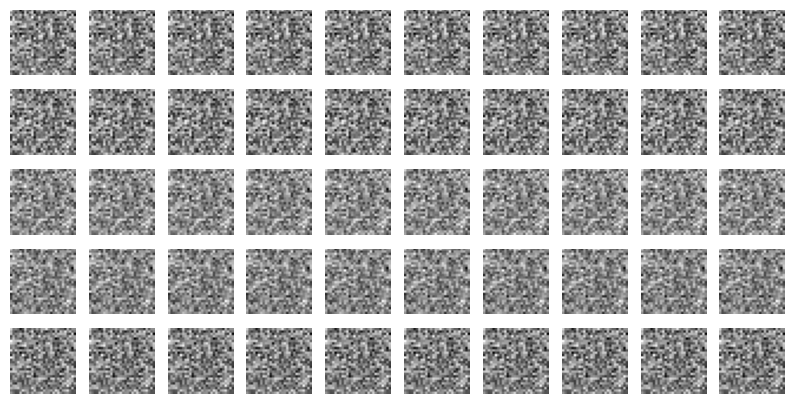

In [ ]:
plot_reconstructed_images(reconstructed_images_32)

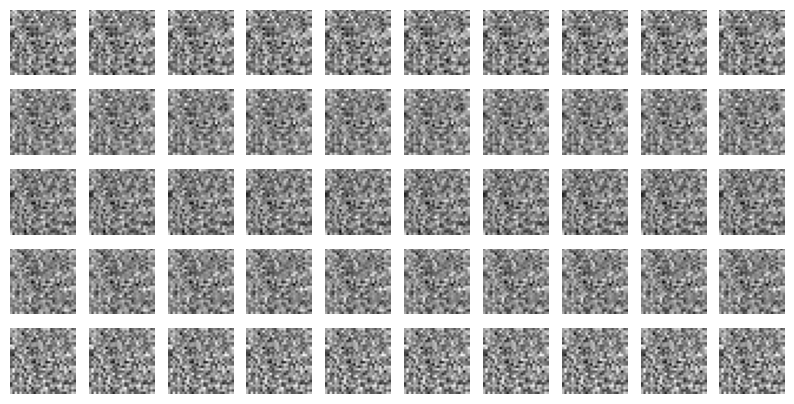

In [ ]:
plot_reconstructed_images(reconstructed_images_64)

# Q2 VAE

In [53]:
#VAE implementation
class VAE(nn.Module):
    def __init__(self, input_dim=784,latent_dim=16, device=device):
        super(VAE, self).__init__()
        # encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2)
            )

        # latent mean and variance
        self.mean_layer = nn.Linear(64, latent_dim)
        self.var_layer = nn.Linear(64, latent_dim)

        # decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim,64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, input_dim),
            nn.Sigmoid()
            )


    def forward(self, x):
        x = self.encoder(x)
        mean = self.mean_layer(x)
        log_var = self.var_layer(x)
        var = torch.exp(0.5 * log_var)
        epsilon = torch.randn_like(var).to(device)
        z = mean + var*epsilon
        x_hat = self.decoder(z)
        return x_hat, mean, log_var


In [54]:
#Loss function
def loss_function(x, x_hat, mean, var):
    loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    K_divergence = - 0.5 * torch.sum(1+ var - mean.pow(2) - var.exp())

    return loss + K_divergence

In [55]:
#Training VAE model
model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs=50
for epoch in range(epochs):
  overall_loss = 0
  for batch, (x, _) in enumerate(train_loader):
    x = x.view(batch_size, 784).to(device)
    optimizer.zero_grad()
    x_hat, mean, log_var = model(x)
    loss = loss_function(x, x_hat, mean, log_var)
    overall_loss += loss.item()
    loss.backward()
    optimizer.step()

  print("Epoch", epoch + 1, " Average Loss: ", overall_loss/(batch*batch_size))

Epoch 1  Average Loss:  179.8874496393729
Epoch 2  Average Loss:  134.88747913188647
Epoch 3  Average Loss:  123.3272818140912
Epoch 4  Average Loss:  116.92897700594742
Epoch 5  Average Loss:  113.83914355957846
Epoch 6  Average Loss:  111.80289849945221
Epoch 7  Average Loss:  110.46771291997078
Epoch 8  Average Loss:  109.41914712998226
Epoch 9  Average Loss:  108.59258749934787
Epoch 10  Average Loss:  107.87129696955864
Epoch 11  Average Loss:  107.186644439952
Epoch 12  Average Loss:  106.65049214511164
Epoch 13  Average Loss:  106.21679369587333
Epoch 14  Average Loss:  105.79777270385539
Epoch 15  Average Loss:  105.3865364311613
Epoch 16  Average Loss:  105.02471291671014
Epoch 17  Average Loss:  104.79648582598603
Epoch 18  Average Loss:  104.50499388629487
Epoch 19  Average Loss:  104.23508498865296
Epoch 20  Average Loss:  103.9343112707377
Epoch 21  Average Loss:  103.72323491626669
Epoch 22  Average Loss:  103.4898069536467
Epoch 23  Average Loss:  103.31405837528693
Epoc

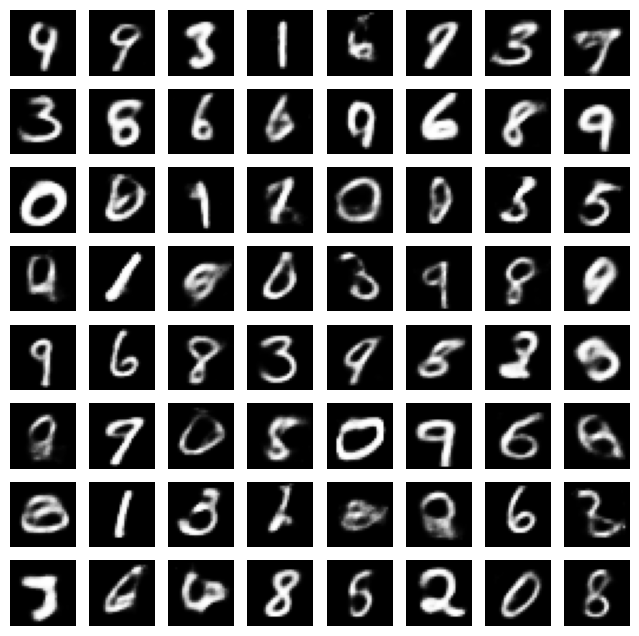

In [57]:
#Displaying 64 images
samples = torch.randn(64, 16).to(device)
generated_images = model.decoder(samples)

fig = plt.figure(figsize=(8, 8))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.axis("off")
    plt.imshow(generated_images[i].view(28, 28).cpu().detach().numpy(), cmap='gray')

plt.show()